# Finger 1 - Punto 2

# Seteo inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

import warnings 
warnings.filterwarnings('ignore')

In [7]:
clicks = pd.read_csv('./Data/clicks.csv.gzip', compression = 'gzip')

In [8]:
clicks.loc[:,'created'] = pd.to_datetime(clicks['created'], errors='coerce')

In [9]:
clicks.dtypes

advertiser_id                    int64
action_id                      float64
source_id                        int64
created            datetime64[ns, UTC]
country_code                     int64
latitude                       float64
longitude                      float64
wifi_connection                   bool
carrier_id                     float64
trans_id                        object
os_minor                       float64
agent_device                   float64
os_major                       float64
specs_brand                      int64
brand                          float64
timeToClick                    float64
touchX                         float64
touchY                         float64
ref_type                         int64
ref_hash                         int64
dtype: object

## Creo columna nueva solo con hora y minutos

In [17]:
clicks['created_time'] =clicks['created'].dt.time.map(lambda x: x.replace(second=0, microsecond = 0)) 

In [18]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,created_time
0,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093,22:42:00
1,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,10:24:00
2,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,15:24:00
3,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,03:08:00
4,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,03:32:00


## Obtengo clicks por horario

In [51]:
clicks_by_time = clicks.groupby('created_time').agg({'created_time':['count']})
clicks_by_time.columns = ['Cantidad de clicks']
clicks_by_time.index.name = 'Hora'
clicks_by_time.head()

,Cantidad de clicks
Hora,
00:00:00,34
00:01:00,16
00:02:00,20
00:03:00,15
00:04:00,8


## Visualizacion de cantidad de clicks a lo largo del tiempo

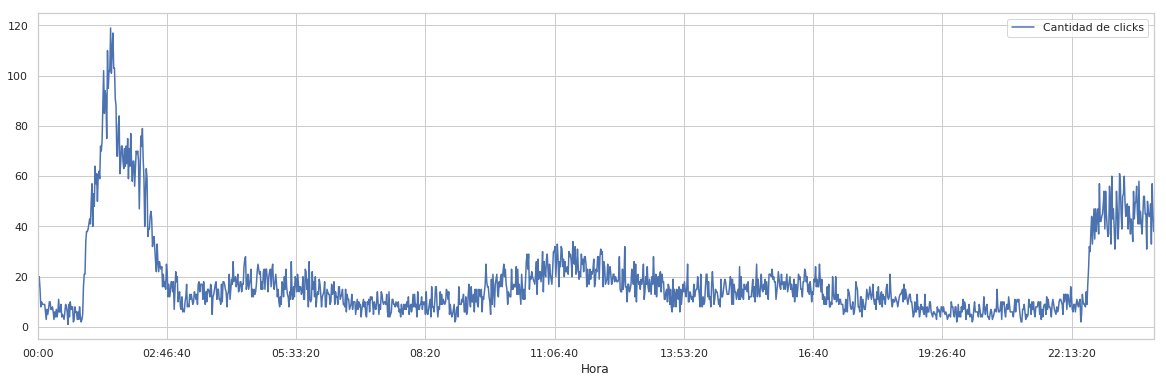

In [54]:
clicks_by_time.plot(figsize=(20,6));

In [56]:
clicks_by_time.sort_values(by='Cantidad de clicks', ascending=False).head()

,Cantidad de clicks
Hora,
01:34:00,119
01:37:00,117
01:30:00,110
01:36:00,110
01:38:00,103


## El rango horario con mayor cantidad de clicks suele ser al rededor de las 01:00 am.